In [1]:
# Krok pierwszy: Napisz funkcję pobierz_aktualne_dane() do pobierania aktualnych danych o kursach walut. 
# Przydatne będzie ci kilka rzeczy:
# 1. Zapoznaj się z opisem pobierania danych na stronie NBP: http://api.nbp.pl/
# 2. Zapoznaj się z funkcją get() z pakietu requests
# 3. Przypomnij sobie obsługę pakietu json i słowników z wczoraj
# 4. Przypomnij sobie, jak napisać funkcję

In [2]:
import requests
import json
def pobierz_aktualne_dane():
    NBP="http://api.nbp.pl/api/exchangerates/tables/c/"
    dane = requests.get(url=NBP)
    dane_json = json.loads(dane.text)[0]
    return dane_json
test = pobierz_aktualne_dane()
print(test)

{'table': 'C', 'effectiveDate': '2017-07-06', 'rates': [{'currency': 'dolar amerykański', 'ask': 3.786, 'code': 'USD', 'bid': 3.711}, {'currency': 'dolar australijski', 'ask': 2.8691, 'code': 'AUD', 'bid': 2.8123}, {'currency': 'dolar kanadyjski', 'ask': 2.9174, 'code': 'CAD', 'bid': 2.8596}, {'currency': 'euro', 'ask': 4.291, 'code': 'EUR', 'bid': 4.206}, {'currency': 'forint (Węgry)', 'ask': 0.013901, 'code': 'HUF', 'bid': 0.013625}, {'currency': 'frank szwajcarski', 'ask': 3.9146, 'code': 'CHF', 'bid': 3.837}, {'currency': 'funt szterling', 'ask': 4.8911, 'code': 'GBP', 'bid': 4.7943}, {'currency': 'jen (Japonia)', 'ask': 0.033382, 'code': 'JPY', 'bid': 0.03272}, {'currency': 'korona czeska', 'ask': 0.1642, 'code': 'CZK', 'bid': 0.161}, {'currency': 'korona duńska', 'ask': 0.577, 'code': 'DKK', 'bid': 0.5656}, {'currency': 'korona norweska', 'ask': 0.4514, 'code': 'NOK', 'bid': 0.4424}, {'currency': 'korona szwedzka', 'ask': 0.4449, 'code': 'SEK', 'bid': 0.4361}, {'currency': 'SDR (

In [3]:
# Krok drugi: Napisz kilka potrzebnych funkcji z wykorzstaniem informacji zdobytych w kroku pierwszym:
# 1. funkcja wylistuj_dostspne_waluty()
# 2. funkcja kup_walute(waluta, kwota)
# 3. funkcja sprzedaj_walute(waluta, kwota)

In [4]:
def wylistuj_dostepne_waluty():
    lista_walut = []
    dane = pobierz_aktualne_dane()
    for waluta in dane["rates"]:
        waluta_tekst = "{} <{}>".format(waluta['currency'], waluta["code"])
        lista_walut.append(waluta_tekst)
    return lista_walut
test = wylistuj_dostepne_waluty()
print(test)

['dolar amerykański <USD>', 'dolar australijski <AUD>', 'dolar kanadyjski <CAD>', 'euro <EUR>', 'forint (Węgry) <HUF>', 'frank szwajcarski <CHF>', 'funt szterling <GBP>', 'jen (Japonia) <JPY>', 'korona czeska <CZK>', 'korona duńska <DKK>', 'korona norweska <NOK>', 'korona szwedzka <SEK>', 'SDR (MFW) <XDR>']


In [21]:
def kup_walute(waluta, kwota):
    dane = pobierz_aktualne_dane()
    for waluta_dane in dane["rates"]:
        if waluta_dane["code"] in waluta:
            cena_kupna = waluta_dane["ask"]
            break
    cena_koncowa = cena_kupna * kwota
    ### *2.
    cena_koncowa = round(cena_koncowa, 2)
    ###
    return cena_koncowa
test = kup_walute("USD", 10)
print(test)

37.86


In [22]:
def sprzedaj_walute(waluta, kwota):
    dane = pobierz_aktualne_dane()
    for waluta_dane in dane["rates"]:
        if waluta_dane["code"] in waluta:
            cena_sprzedazy = waluta_dane["bid"]
            break
    kwota_koncowa = kwota / cena_sprzedazy
    ### *2.
    kwota_koncowa = round(kwota_koncowa, 2)
    ###
    return kwota_koncowa
test = sprzedaj_walute("USD", 10)
print(test)

2.69


In [7]:
# Krok trzeci: Zapoznaj się z podstawową obsługą tworzenia interfejsu w notebooku ze strony: 
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html, a następnie stwórz:
# 1. Selektor tego, czy chcesz kupić czy sprzedać walutę
# 2. Selektor do wybrania waluty
# 3. Pole tekstowe, gdzie należy wpisać kwotę
# 4. Przycisk "oblicz"
# Potem za pomocą funkcji display() zobacz, jak prezentują się powyższe elementy

In [8]:
from ipywidgets import widgets

In [9]:
typ_transakcji_selektor = widgets.Dropdown(
    options=['Kupno', 'Sprzedaż'],
    value='Kupno',
    description='Typ transakcji:'
)

In [10]:
waluta_selektor = widgets.Dropdown(
    options=wylistuj_dostepne_waluty(),
    description='Waluta:'
)

In [11]:
kwota_selektor = widgets.Text(
    value='0.0',
    placeholder='Type something',
    description='Kwota:'
)

In [12]:
wykonaj = widgets.Button(
    description="Wykonaj"
)

In [13]:
from IPython.display import display

In [14]:
display(typ_transakcji_selektor, waluta_selektor, kwota_selektor, wykonaj)

Podaj poprawną kwotę w polu 'kwota'


In [15]:
# Krok czwarty: Pora połączyć backend (czyli napisane funkcje) z fronendem (czyli interfejsem)
# 1. Zapoznaj się z funkcją on_click(), którą możesz zastosować na Przycisku (4.)
# 2. Napisz funkcję wykonaj_na_klik(), która pobiera wartości z elemntów interfejsu i w zależności od tego, 
#    czy zostało wybrane kupno czy sprzedać printuje ile należy zapłacić lub ile zostanie zapłacone klientowi.
# 3. Zapoznaj się z funkcją clear_output() z pakietu IPython.display i wykorzystaj ją

In [20]:
from IPython.display import clear_output
def wykonaj_na_klik(b):
    clear_output()
    typ_transakcji = typ_transakcji_selektor.value
    waluta = waluta_selektor.value
    kwota = kwota_selektor.value
    #### *1.
    if not kwota.isdigit():
        print("Podaj poprawną kwotę w polu 'kwota'")
        return
    ####
    kwota = float(kwota_selektor.value)
    if typ_transakcji.lower() == "kupno":
        do_zaplaty = kup_walute(waluta, kwota)
        print("Należy zapłacić {} zł.".format(do_zaplaty))
    else:
        otrzymana_kwota = sprzedaj_walute(waluta, kwota)
        print("Otrzymujesz {} zł".format(otrzymana_kwota))
wykonaj.on_click(wykonaj_na_klik)

In [17]:
# Krok piąty (dodatkowy): A teraz pora na "bonusy"
# 1. Spróbuj upewnić się, że w polu kwota wpisana jest liczba, a jeśli nie, to wyprintuj "Podaj poprawną kwotę w polu "kwota""
# 2. Zaokrąglij podaną kwotę i rezultat, który program zwraca do dwóch miejsc po przecinku (funkca round())
# 3. Stwórz dodatkową funkcjonalość, która pozwala zobaczyć historię kursów z ostatnich 10 dni (spójrz raz jeszcze na stronę
#    NBP) - wyprintuj 10 linijek, gdzie w każdej mamy datę i kurs kupna oraz sprzedaży.
# 4. Do powyższej funkcjonalności dodaj wizualizację za pomocą pakietu matplotlib
# 5.*** Dodaj powyższe dodatki do interfejsu

In [36]:
### *3.
def pokaz_10_ostatnich_dni(waluta):
    NBP = "http://api.nbp.pl/api/exchangerates/tables/c/last/10/"
    dane = requests.get(url=NBP)
    dane_json = json.loads(dane.text)
    print("Waluta: {}".format(waluta))
    for wiersz in dane_json:
        data = wiersz['effectiveDate']
        for waluta_dane in wiersz['rates']:
            if waluta_dane['code'] in waluta:
                print("Dzień: {}, cena kupna: {}, cena sprzedaży: {}".format(data, waluta_dane['ask'], waluta_dane['bid']))
pokaz_10_ostatnich_dni("USD")
###

Waluta: USD
Dzień: 2017-06-23, cena kupna: 3.8411, cena sprzedaży: 3.7651
Dzień: 2017-06-26, cena kupna: 3.8148, cena sprzedaży: 3.7392
Dzień: 2017-06-27, cena kupna: 3.7918, cena sprzedaży: 3.7168
Dzień: 2017-06-28, cena kupna: 3.7761, cena sprzedaży: 3.7013
Dzień: 2017-06-29, cena kupna: 3.7658, cena sprzedaży: 3.6912
Dzień: 2017-06-30, cena kupna: 3.7574, cena sprzedaży: 3.683
Dzień: 2017-07-03, cena kupna: 3.7367, cena sprzedaży: 3.6627
Dzień: 2017-07-04, cena kupna: 3.7642, cena sprzedaży: 3.6896
Dzień: 2017-07-05, cena kupna: 3.7794, cena sprzedaży: 3.7046
Dzień: 2017-07-06, cena kupna: 3.786, cena sprzedaży: 3.711


In [49]:
### *4.
import datetime
def rysuj_10_ostatnich_dni(waluta):
    x = []
    kupno = []
    sprzedaz = []
    NBP = "http://api.nbp.pl/api/exchangerates/tables/c/last/10/"
    dane = requests.get(url=NBP)
    dane_json = json.loads(dane.text)
    for wiersz in dane_json:
        data = wiersz['effectiveDate']
        for waluta_dane in wiersz['rates']:
            if waluta_dane['code'] in waluta:
                x.append(datetime.datetime.strptime(data, '%Y-%m-%d'))
                kupno.append(waluta_dane['ask'])
                sprzedaz.append(waluta_dane['bid'])
    return x, kupno, sprzedaz
###

In [50]:
x, kupno, sprzedaz = rysuj_10_ostatnich_dni("USD")
x

[datetime.datetime(2017, 6, 23, 0, 0),
 datetime.datetime(2017, 6, 26, 0, 0),
 datetime.datetime(2017, 6, 27, 0, 0),
 datetime.datetime(2017, 6, 28, 0, 0),
 datetime.datetime(2017, 6, 29, 0, 0),
 datetime.datetime(2017, 6, 30, 0, 0),
 datetime.datetime(2017, 7, 3, 0, 0),
 datetime.datetime(2017, 7, 4, 0, 0),
 datetime.datetime(2017, 7, 5, 0, 0),
 datetime.datetime(2017, 7, 6, 0, 0)]

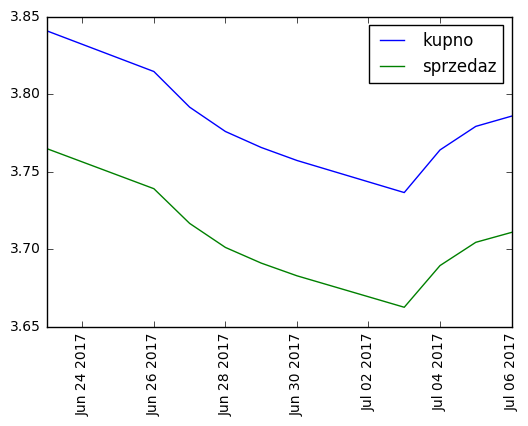

In [59]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(x, kupno, label="kupno")
plt.plot(x, sprzedaz, label="sprzedaz")
plt.xticks(rotation='vertical')
plt.legend()
plt.show()